# <center> Machine learning</center>
## <center> Introduction et quelques examples pour le sport </center>
### <center> Dimension reduction </center>

<center> Rémi Carmigniani</center>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition,manifold
from sklearn.neighbors import NearestNeighbors,KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from scipy.interpolate import griddata

In [49]:
def func(t):
    return np.array([t*np.cos(3*t),t*np.sin(3*t)])
def datapoint(t,func,noise=0.1):
    '''
    return a data point generated by func with some noise with range noise
    '''
    x_tab =  func(t)
    noise_tab  =t*np.random.uniform(low=-noise, high=noise, size=x_tab.shape)
    return x_tab+noise_tab

In [50]:
y_tab.shape

(2, 101)

In [51]:
y_tab = datapoint(np.random.rand(500),func).transpose()
y_tab = np.append(y_tab,[np.array([-0.2,0.3])],axis=0).transpose()
t_tab = np.arange(0,1,0.01)
y_original = func(t_tab)
embedding = manifold.Isomap(n_components=1,n_neighbors=5)
X_transformed = embedding.fit_transform(y_tab.transpose())
t_r_tab = np.arange(np.min(X_transformed)-0.2,np.max(X_transformed)+0.2,0.01)
data = y_tab.transpose()
embedded_points = X_transformed

In [52]:
k_neighbors=5
# Choose a point in the embedded space for inverse transformation

embedded_point = embedded_points[0]  # Example point, change as needed
def inverse_transform_func(embedded_point,embedded_points,data,k_neighbors=7):
    knn = NearestNeighbors(n_neighbors=k_neighbors)
    knn.fit(embedded_points)
    # Find the k nearest neighbors in the embedded space
    distances, indices = knn.kneighbors(embedded_point.reshape(1, -1), n_neighbors=k_neighbors)
    indices = indices.flatten()
    indices=indices[:]#remove fist
    # Get the coordinates of the k nearest neighbors and the corresponding original data
    k_nearest_points = embedded_points[indices]
    k_nearest_data = data[indices]
    #print(indices)
    # Perform piecewise linear interpolation
    linear_regressor = LinearRegression()
    linear_regressor.fit(k_nearest_points, k_nearest_data)
    inverse_transformed_point =  linear_regressor.predict(embedded_point.reshape(-1, 1))
    return inverse_transformed_point
def inverse_transform_func_list(embedded_point,embedded_points,data,k_neighbors=7):
    inverse_transformed_list=[]
    for i in range(len(embedded_point)):
        inverse_transformed_list.append(inverse_transform_func(embedded_point[i],embedded_points,data,k_neighbors).flatten())
    return np.array(inverse_transformed_list)

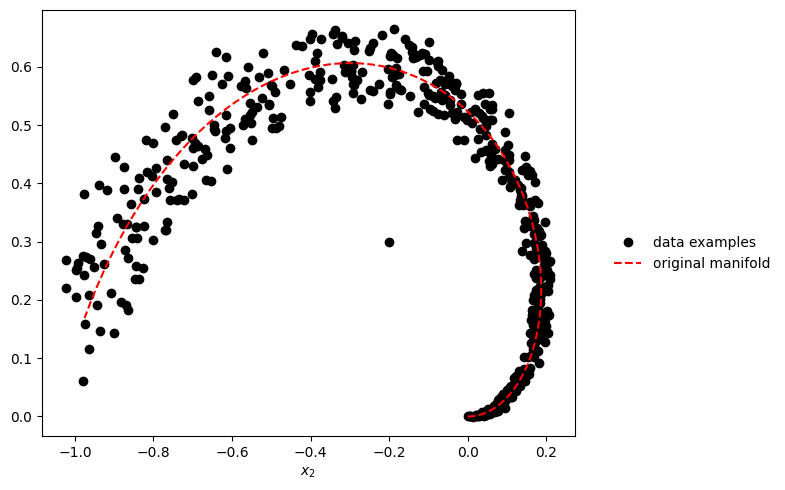

In [53]:
plt.figure(figsize=(8,5))
plt.plot(y_tab[0,:],y_tab[1,:],'ok',label='data examples')
plt.plot(y_original[0,:],y_original[1,:],'--r',label='original manifold')
plt.xlabel('$x_1$')
plt.xlabel('$x_2$')
plt.legend(bbox_to_anchor=(1.05, .5),loc='upper left',frameon=False)
plt.tight_layout()
plt.savefig('../../Presentations/img/courbe_para.png')

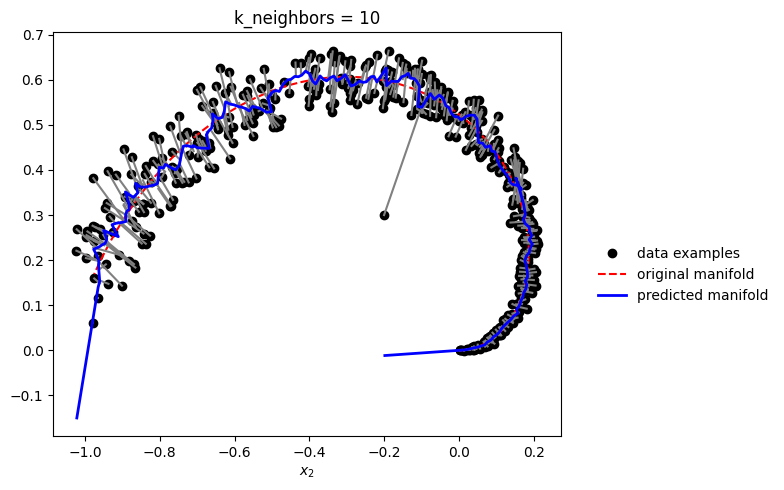

In [54]:
k_neighbors=10
plt.figure(figsize=(8,5))
plt.plot(y_tab[0,:],y_tab[1,:],'ok',label='data examples')
plt.plot(y_original[0,:],y_original[1,:],'--r',label='original manifold')

for i in range(len(y_tab[0])):
    embedded_point = embedding.transform(y_tab[:,i].reshape(1,-1))
    inverse_transform_point = inverse_transform_func(embedded_point,embedded_points,data,k_neighbors=k_neighbors).flatten()
    plt.plot([y_tab[0,i],inverse_transform_point[0]],[y_tab[1,i],inverse_transform_point[1]],'-',color='gray')
    #print(inverse_transform_point)
y_pred = inverse_transform_func_list(t_r_tab,embedded_points,data,k_neighbors=k_neighbors)
#plt.plot(y_pred_2[:,0],y_pred_2[:,1],'-',color='orange',label='predicted manifold',lw=2)
plt.plot(y_pred[:,0],y_pred[:,1],'-b',label='predicted manifold',lw=2)
plt.xlabel('$x_1$')
plt.xlabel('$x_2$')
plt.legend(bbox_to_anchor=(1.05, .5),loc='upper left',frameon=False)
plt.title('k_neighbors = %d'%k_neighbors)
plt.tight_layout()
plt.savefig('../../Presentations/img/courbe_para_prediction.png')

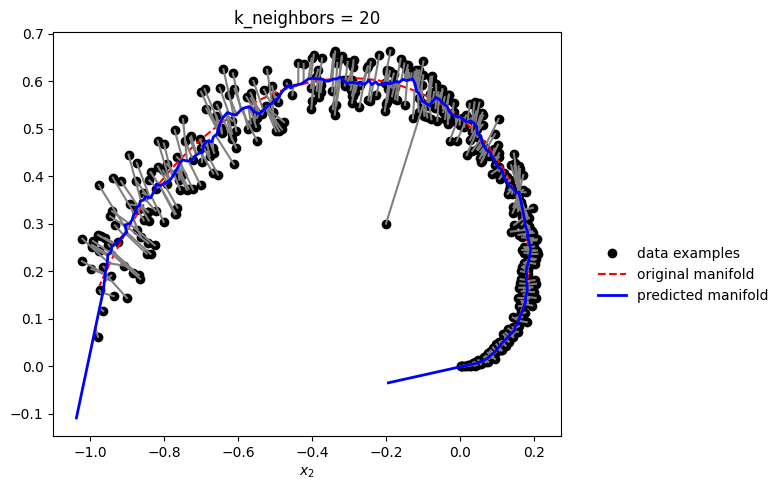

In [56]:
k_neighbors=20
plt.figure(figsize=(8,5))
plt.plot(y_tab[0,:],y_tab[1,:],'ok',label='data examples')
plt.plot(y_original[0,:],y_original[1,:],'--r',label='original manifold')

for i in range(len(y_tab[0])):
    embedded_point = embedding.transform(y_tab[:,i].reshape(1,-1))
    inverse_transform_point = inverse_transform_func(embedded_point,embedded_points,data,k_neighbors=k_neighbors).flatten()
    plt.plot([y_tab[0,i],inverse_transform_point[0]],[y_tab[1,i],inverse_transform_point[1]],'-',color='gray')
    #print(inverse_transform_point)
y_pred = inverse_transform_func_list(t_r_tab,embedded_points,data,k_neighbors=k_neighbors)
#plt.plot(y_pred_2[:,0],y_pred_2[:,1],'-',color='orange',label='predicted manifold',lw=2)
plt.plot(y_pred[:,0],y_pred[:,1],'-b',label='predicted manifold',lw=2)
plt.xlabel('$x_1$')
plt.xlabel('$x_2$')
plt.legend(bbox_to_anchor=(1.05, .5),loc='upper left',frameon=False)
plt.title('k_neighbors = %d'%k_neighbors)
plt.tight_layout()
plt.savefig('../../Presentations/img/courbe_para_prediction_%d.png'%k_neighbors)

# Test sur des vrais trajectoires

In [ ]:
import cv2

In [ ]:
cap = cv2.VideoCapture('Zoom_Nicolas_Doriano_20211216_10x25m_Crawl_5.mp4')

In [ ]:
time_ms=4*1000
cap.set(cv2.CAP_PROP_POS_MSEC,time_ms)
frame_list =[]
for i in range(50*10):
    ret,frame = cap.read()
    frame_small = cv2.resize(frame[200:600,100:800],(100,100))
    gray_frame = cv2.cvtColor(frame_small, cv2.COLOR_BGR2GRAY)
    
    frame_list.append(gray_frame.flatten())
    cv2.imwrite('animation/%06d.png'%i,frame[200:600,100:800,:])

In [ ]:
frame[200:600,100:800,[2,1,0]].shape

In [ ]:
plt.imshow(frame[200:600,100:800,[2,1,0]])

In [ ]:
y_tab = np.vstack(frame_list)
embedding = decomposition.SparsePCA(n_components=2)
X_transformed = embedding.fit_transform(y_tab)

In [ ]:
plt.plot(X_transformed[:,0],X_transformed[:,1],'o')

In [ ]:
for i in range(len(frame_list)):
    fig,ax=plt.subplots(ncols=2,figsize=(10,5))
    ax[1].plot(X_transformed[:,0],X_transformed[:,1],'o')
    ax[1].plot(X_transformed[i,0],X_transformed[i,1],'ro')
    ax[0].imshow(frame_list[i].reshape(400,700), cmap='gray', vmin=0, vmax=255)
    ax[0].axis(False)
    fig.savefig('reduction/%06d.png'%i)
    plt.close()

In [ ]:
np.array(frame_list).shape

###  Test Nicolas

In [1]:
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.compat.v1.keras.backend import set_session

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout,GlobalAveragePooling2D,SeparableConv2D,Flatten,MaxPool2D
from keras.layers import UpSampling2D
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import matplotlib.pyplot as plt

import cv2
import numpy as np

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
def triplet_loss(y_true, y_pred, alpha=0.01):
    anchor = y_pred[0]
    positive = y_pred[1]
    negative = y_pred[2]
    pos_distance = K.sum(K.abs(anchor - positive), axis=-1)
    neg_distance = K.sum(K.abs(anchor - negative), axis=-1)
    loss = K.maximum(pos_distance - neg_distance + alpha, 0.0)
    return K.mean(loss)

In [3]:
def create_triplet_model(input_shape):
    anchor_input = Input(shape=input_shape)
    positive_input = Input(shape=input_shape)
    negative_input = Input(shape=input_shape)

    # Shared embedding layers
    embedding_model = keras.Sequential([
        Conv2D(4, (3, 3), activation='relu',kernel_initializer = 'he_normal', input_shape=(height, width, channels)),
        MaxPooling2D((2, 2)),
        Conv2D(8, (3, 3), activation='relu',kernel_initializer = 'he_normal'),
        MaxPooling2D((2, 2)),
        Conv2D(16, (3, 3), activation='relu',kernel_initializer = 'he_normal'),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu',kernel_initializer = 'he_normal'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu',kernel_initializer = 'he_normal'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu',kernel_initializer = 'he_normal'),
        MaxPooling2D((2, 2)),
        # Add global average poolin
        GlobalAveragePooling2D(),
        # Output layer
        Dense(32,activation='relu')
    ])

    anchor_embedding = embedding_model(anchor_input)
    positive_embedding = embedding_model(positive_input)
    negative_embedding = embedding_model(negative_input)

    triplet_model = keras.Model(
        inputs=[anchor_input, positive_input, negative_input],
        outputs=[anchor_embedding, positive_embedding, negative_embedding]
    )

    triplet_model.add_loss(triplet_loss(None,triplet_model.output))
    return triplet_model


In [4]:
# Define the input shape
height=192
width=192
channels=5

input_shape = (height, width, channels)

# Create the triplet model
model = create_triplet_model(input_shape)

num_epochs=30
batch_size=1

# Define the fixed learning rate
fixed_learning_rate = 0.0001
# Define the learning rate scheduler
def fixed_lr_scheduler(epoch):
    return fixed_learning_rate
# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(fixed_lr_scheduler)
# Compile the model
model.compile(optimizer='adam')

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 192, 192, 5) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 192, 192, 5) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 192, 192, 5) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 32)           102768      input_1[0][0]                    
                                                                 input_2[0][0]                

In [6]:
cap = cv2.VideoCapture('Zoom_Nicolas_Doriano_20211216_10x25m_Crawl_5.mp4')
time_ms=4*1000
cap.set(cv2.CAP_PROP_POS_MSEC,time_ms)
frame_list =[]
for i in range(50*5):
    ret,frame = cap.read()
    frame_small = cv2.resize(frame[200:600,100:800],(width,height))
    gray_frame = cv2.cvtColor(frame_small, cv2.COLOR_BGR2GRAY)
    frame_list.append(frame_small)
    cv2.imwrite('animation/%06d.png'%i,frame[200:600,100:800,:])
    ret,frame = cap.read()

In [7]:
frame_list = np.array(frame_list)

In [8]:
# Calculate optical flow
gray_frame_prev = cv2.cvtColor(frame_list[0][:], cv2.COLOR_BGR2GRAY)
gray_frame_next = cv2.cvtColor(frame_list[1][:], cv2.COLOR_BGR2GRAY)
red_frame_prev =frame_list[0][:,:,2]
red_frame_next = frame_list[1][:,:,2]
flow = cv2.calcOpticalFlowFarneback(red_frame_prev,red_frame_next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Calculate the amplitude and magnitude of the optical flow
amplitude = np.sqrt(flow[..., 0]**2 + flow[..., 1]**2)
magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])


In [9]:
frame_list_enhanced = np.empty((0,width,height,3+2))
for i in range(len(frame_list)-1):
    red_frame_current =frame_list[i][:,:,2]
    red_frame_next = frame_list[i+1][:,:,2]
    flow = cv2.calcOpticalFlowFarneback(red_frame_prev,red_frame_next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    amplitude = np.sqrt(flow[..., 0]**2 + flow[..., 1]**2)
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    input_img = np.zeros((width,height,5))
    input_img[:,:,:3]=frame_list[i][:]
    #
    input_img[:,:,3] = amplitude
    input_img[:,:,4] = magnitude
    frame_list_enhanced = np.append(frame_list_enhanced,[input_img],axis=0)
    

In [10]:
frame_list_enhanced.shape

(249, 192, 192, 5)

In [11]:
anchor_data = frame_list_enhanced[:-2]
positive_data = frame_list_enhanced[1:-1]
negative_data = frame_list_enhanced[2:]

In [12]:
# Train the model using your training data
history = model.fit(
    [anchor_data/255, positive_data/255, negative_data/255],
    None,
    epochs=num_epochs,
    batch_size=1,
    callbacks=[lr_scheduler]
)

Epoch 1/30
247/247 [==============================] - 4s 8ms/step - loss: 0.0116
Epoch 2/30
247/247 [==============================] - 3s 12ms/step - loss: 0.0075
Epoch 3/30
247/247 [==============================] - 3s 11ms/step - loss: 0.0059
Epoch 4/30
247/247 [==============================] - 3s 12ms/step - loss: 0.0047
Epoch 5/30
247/247 [==============================] - 3s 13ms/step - loss: 0.0050
Epoch 6/30
247/247 [==============================] - 3s 13ms/step - loss: 0.0044
Epoch 7/30
247/247 [==============================] - 3s 13ms/step - loss: 0.0051
Epoch 8/30
247/247 [==============================] - 3s 14ms/step - loss: 0.0046
Epoch 9/30
247/247 [==============================] - 3s 13ms/step - loss: 0.0033
Epoch 10/30
247/247 [==============================] - 3s 12ms/step - loss: 0.0027
Epoch 11/30
247/247 [==============================] - 3s 13ms/step - loss: 0.0027
Epoch 12/30
247/247 [==============================] - 3s 13ms/step - loss: 0.0019
Epoch 13/30
24

In [13]:
from sklearn import decomposition,manifold

In [14]:
data=[]
for i in range(len(frame_list_enhanced)):
    data_single = model.predict([frame_list_enhanced[[i],:,:,:]/255,frame_list_enhanced[[i],:,:,:]/255,frame_list_enhanced[[i],:,:,:]/255])
    data.append(data_single[0][0])

In [15]:
data=np.array(data)

In [16]:
data_single[0]

array([[0.        , 0.        , 0.        , 0.00928153, 0.        ,
        0.02691801, 0.        , 0.02792738, 0.        , 0.        ,
        0.        , 0.        , 0.01745026, 0.02849226, 0.02206635,
        0.        , 0.        , 0.0468948 , 0.        , 0.04103212,
        0.        , 0.        , 0.        , 0.00859297, 0.        ,
        0.00765965, 0.        , 0.        , 0.00759677, 0.        ,
        0.        , 0.02664749]], dtype=float32)

In [17]:
data.shape

(249, 32)

In [19]:
embedding = manifold.Isomap(n_components=2,n_neighbors=32)
X_transformed = embedding.fit_transform(data)

In [20]:
X_transformed.shape

(249, 2)

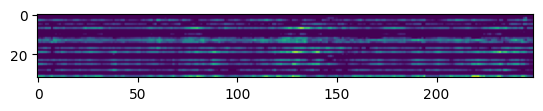

In [21]:
plt.imshow(data.transpose())
plt.show()

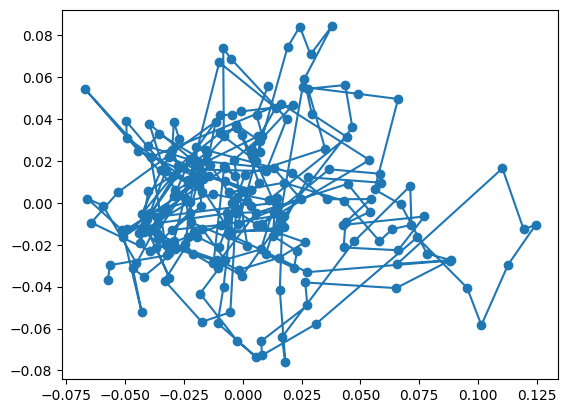

In [22]:
plt.plot(X_transformed[:,0],X_transformed[:,1],'-o')
plt.show()

In [ ]:
i=10
fig,ax=plt.subplots(ncols=2,figsize=(10,5))
ax[1].plot(X_transformed[:,0],X_transformed[:,1],'o-')
ax[1].plot(X_transformed[i,0],X_transformed[i,1],'ro')
ax[0].imshow(frame_list[i][:,:,[2,1,0]])
ax[0].axis(False)
plt.show()

In [ ]:
for i in range(len(frame_list_enhanced)):
    fig,ax=plt.subplots(ncols=2,figsize=(10,5))
    ax[1].plot(X_transformed[:,0],X_transformed[:,1],'o')
    ax[1].plot(X_transformed[i,0],X_transformed[i,1],'ro')
    ax[0].imshow(frame_list[i][:,:,[2,1,0]])
    ax[0].axis(False)
    fig.savefig('reduction2/%06d.png'%i)
    plt.close()

## last trial

In [76]:
def plotSkeletonB(ax,bodyMarkers,connectionsMarkers=np.array([[0,1],\
                                              [1,2],[2,3],[3,4],\
                                              [1,5],[5,6],[6,7],\
                                              [1,8],[8,9],[9,10],\
                                              [1,11],[11,12],[12,13]]),
                th=0.3,
                color_val='red',alpha=1):
    '''
    fonction pour tracer un skelette sur un plot
    '''
    
    for i in range(len(connectionsMarkers)):
            a,b = connectionsMarkers[i,0],connectionsMarkers[i,1]
            x = [bodyMarkers[a,0],bodyMarkers[b,0]]
            y = [bodyMarkers[a,1],bodyMarkers[b,1]]
            ax.plot(x,y,'-',c=color_val,alpha=alpha)

In [77]:
def rescale_x(x_pixel):
    return (7800-x_pixel)/300+1
def rescale_y(x_pixel):
    return (600-x_pixel)/300

In [78]:
net_data = np.loadtxt('network_solution_2_Nicolas_Doriano_20211216_10x25m_Crawl_9.txt')
net_data=net_data[50*4:,:]

In [79]:
flag = net_data[:,4*3+3+2]>.3
x_hand_L = net_data[flag,4*3+3]
y_hand_L = net_data[flag,4*3+3+1]

x_hand_L_all =net_data[:,4*3+3]
y_hand_L_all =net_data[:,4*3+3+1]



flag = net_data[:,7*3+3+2]>.3
x_hand_R = net_data[flag,7*3+3]
y_hand_R = net_data[flag,7*3+3+1]

x_hand_R_all =net_data[:,7*3+3]
y_hand_R_all =net_data[:,7*3+3+1]

x_CM_all = net_data[:,1]
y_CM_all = net_data[:,2]

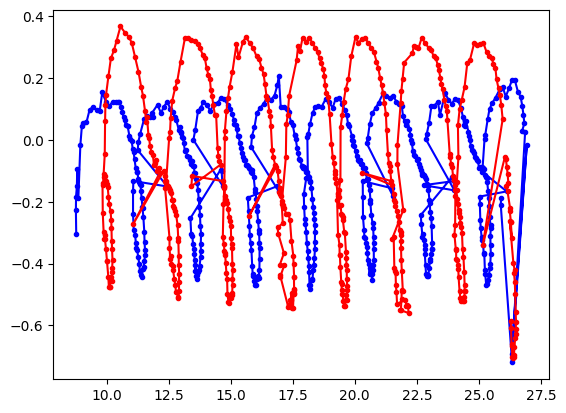

In [80]:
#plt.plot(rescale_x(x_hand_L),rescale_y(y_hand_L),'-b.')
plt.plot(rescale_x(x_hand_L_all),rescale_y(y_hand_L_all),'.-b')
#plt.plot(rescale_x(x_hand_L),rescale_y(y_hand_L),'-b.')
plt.plot(rescale_x(x_hand_R_all),rescale_y(y_hand_R_all),'.-r')
plt.show()

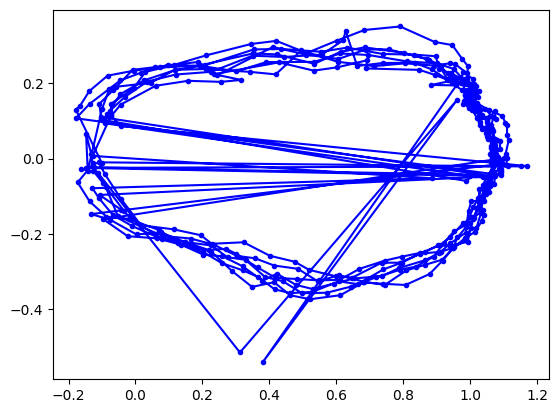

In [81]:
#plt.plot(rescale_x(x_hand_L),rescale_y(y_hand_L),'-b.')
plt.plot(rescale_x(x_hand_L_all)-rescale_x(x_CM_all),rescale_y(y_hand_L_all)-rescale_y(y_CM_all),'.-b')
plt.show()

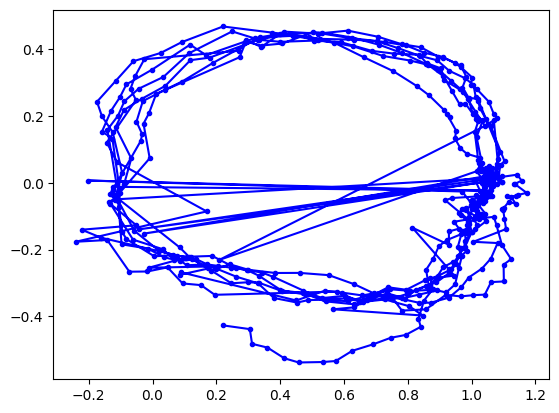

In [82]:
plt.plot(rescale_x(x_hand_R_all)-rescale_x(x_CM_all),rescale_y(y_hand_R_all)-rescale_y(y_CM_all),'.-b')
plt.show()

In [86]:
i=10
x_data = net_data[i,np.arange(3,3+14*3,3)]-net_data[i,1]
y_data = net_data[i,np.arange(3,3+14*3,3)+1]-net_data[i,2]

In [87]:
body_markers= np.vstack([x_data,y_data]).transpose()

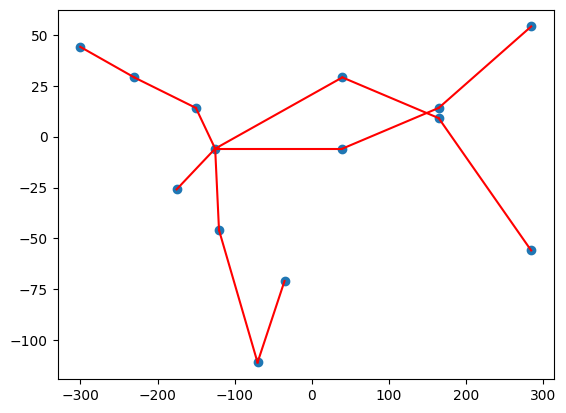

In [88]:
plt.plot(x_data,y_data,'o')
plotSkeletonB(plt,body_markers)
plt.show()

In [89]:
data = []

for i in range(len(net_data)):
    x_data = net_data[i,np.arange(3,3+14*3,3)]-net_data[i,1]
    y_data = net_data[i,np.arange(3,3+14*3,3)+1]-net_data[i,2]
    body_markers= np.vstack([x_data,y_data]).transpose()
    data.append(body_markers.flatten())

In [103]:
data[0].reshape(14,2)

array([[-179.44,  -33.56],
       [-129.44,  -13.56],
       [-114.44,  -63.56],
       [ -24.44,  -33.56],
       [  10.56,   41.44],
       [-149.44,    6.44],
       [-244.44,   -3.56],
       [-319.44,  -13.56],
       [  40.56,  -13.56],
       [ 165.56,    1.44],
       [ 280.56,  -58.56],
       [  40.56,   36.44],
       [ 165.56,   31.44],
       [ 275.56,   61.44]])

In [93]:
data = np.array(data)

In [94]:
embedding = manifold.Isomap(n_components=2,n_neighbors=5)
X_transformed = embedding.fit_transform(data)

/home/remi/Apps/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/remi/Apps/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [95]:
data.shape

(480, 28)

In [105]:
body_markers[:,0]

array([-181.41, -126.41, -151.41, -216.41,   48.59, -126.41,  -41.41,
        -66.41,   38.59,  153.59,  303.59,   28.59,  153.59,  288.59])

In [107]:
for i in range(len(frame_list_enhanced)):
    fig,ax=plt.subplots(ncols=2,figsize=(10,5))
    ax[1].plot(X_transformed[:,0],X_transformed[:,1],'o')
    ax[1].plot(X_transformed[i,0],X_transformed[i,1],'ro')
    body_markers=data[i].reshape(14,2)
    body_markers[:,0] = rescale_x(body_markers[:,0])
    body_markers[:,1] = rescale_x(body_markers[:,1])
    plotSkeletonB(ax[0],body_markers)
    ax[0].axis(False)
    ax[0].set_aspect('equal')
    fig.savefig('reduction2/%06d.png'%i)
    plt.close()
